In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
os.listdir('/content/drive/MyDrive/luminar dataset/Brain_Tumor/Testing')

['meningioma', 'pituitary', 'notumor', 'glioma']

In [ ]:
os.listdir('/content/drive/MyDrive/luminar dataset/Brain_Tumor/Training')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
datadir='/content/drive/MyDrive/luminar dataset/Brain_Tumor/Training'

In [ ]:
X_train=[]
y_train=[]
categories=['pituitary', 'notumor', 'meningioma', 'glioma']
for i in categories:
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  print(i,":",len(images))
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
    #0-pituitary,1 -notumor,2-meningioma,3-glioma
  print('Loaded Category',i)

pituitary : 1389
Loaded Category pituitary
notumor : 1574
Loaded Category notumor
meningioma : 1319
Loaded Category meningioma
glioma : 1287
Loaded Category glioma


In [ ]:
len(X_train)

5569

In [ ]:
len(y_train)

5569

In [ ]:
X_test=[]
y_test=[]
categories=['pituitary', 'notumor', 'meningioma', 'glioma']
datadir1='/content/drive/MyDrive/luminar dataset/Brain_Tumor/Testing'
for i in categories:
  path=os.path.join(datadir1,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  print(i,":",len(images))
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
    #0-pituitary,1 -notumor,2-meningioma,3-glioma
  print('Loaded Category',i)

pituitary : 310
Loaded Category pituitary
notumor : 405
Loaded Category notumor
meningioma : 316
Loaded Category meningioma
glioma : 310
Loaded Category glioma


In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5569, 150, 150, 1)

In [ ]:
#Convolutional layer
model=Sequential()
model.add(Conv2D(32,3,input_shape=(150,150,1),activation='relu'))

#Pooling layer
model.add(MaxPool2D(2,2))

#fully connected layer
model.add(Flatten())
model.add(Dense(10,activation='relu'))

#Output layer
model.add(Dense(4,activation='softmax'))

In [ ]:
#Compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting
model.fit(X_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
56/56 [==============================] - 92s 2s/step - loss: 0.4103 - accuracy: 0.8768
Epoch 2/5
56/56 [==============================] - 109s 2s/step - loss: 0.3958 - accuracy: 0.8854
Epoch 3/5
56/56 [==============================] - 89s 2s/step - loss: 0.3824 - accuracy: 0.8881
Epoch 4/5
56/56 [==============================] - 90s 2s/step - loss: 0.3599 - accuracy: 0.8973
Epoch 5/5
56/56 [==============================] - 89s 2s/step - loss: 0.3544 - accuracy: 0.8941


In [ ]:
#Evaluation function - test function evaluation
loss,accu=model.evaluate(X_test,y_test)
print("Loss:",loss)
print("Accuracy:",accu)

42/42 [==============================] - 6s 136ms/step - loss: 0.3776 - accuracy: 0.8658
Loss: 0.37759438157081604
Accuracy: 0.8657718300819397


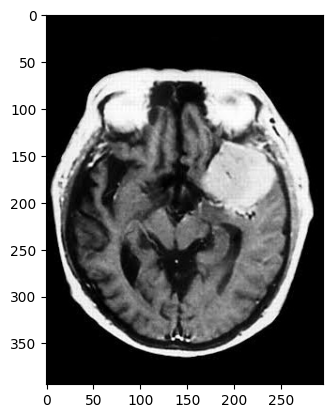

In [ ]:
img=imread('/content/drive/MyDrive/luminar dataset/Brain_Tumor/Testing/meningioma/Te-meTr_0005.jpg')
plt.imshow(img)

In [ ]:
#preprocessing img by resizing and converting to array
img=resize(img,(150,150,1))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,1)

In [ ]:
#Conversion
X_train.shape

(5569, 150, 150, 1)

In [ ]:
#prediction
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.09703787 0.24684791 0.6533177  0.00279652]]


In [ ]:
#The array value of categories i.e 0 for pituitary
ind=pred.argmax()
print(ind)

2


In [ ]:
print(categories[ind])
#The prediction is correct

meningioma
